<a href="https://colab.research.google.com/github/IrfanPurwoSaputro/pcvk_praktik1/blob/main/pcvk_praktik_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
import glob
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma correction pada citra 
-----------------------------
Masukkan nilai gamma: 3


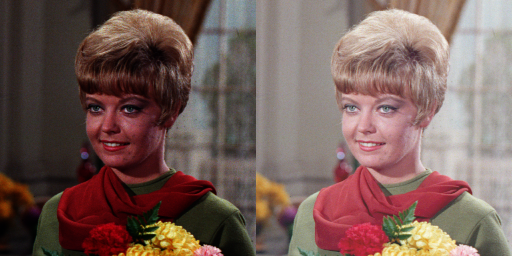

In [12]:
#praktikum 1
print(' Gamma correction pada citra ')
print('-----------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)
  
img = cv.imread('/content/drive/MyDrive/female.tiff')
gammaImg = gammaCorrection(img, gamma)

final_frame = cv.hconcat((img, gammaImg))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 2


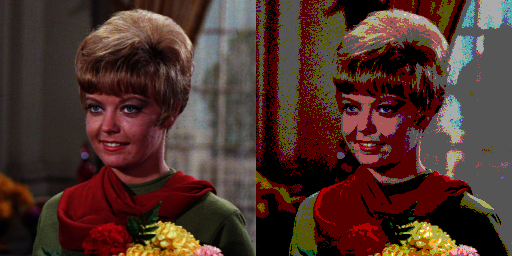

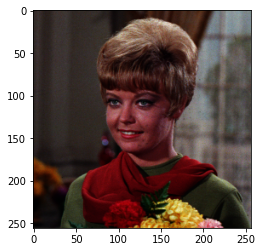

In [13]:
#praktikum2
img_f = cv.imread('/content/drive/MyDrive/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


Nilai PSNR adalah 28.426697025383966 (dB)


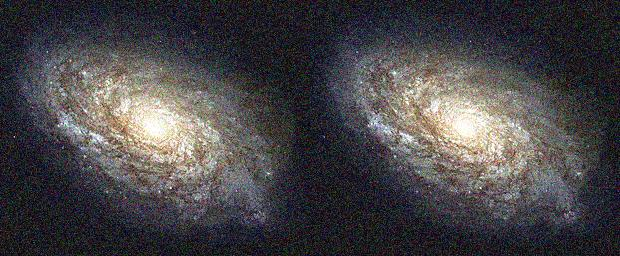

In [45]:
#praktikum3
img = cv.imread('/content/drive/MyDrive/galaxy.jpg')

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if (mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr


cv_img = []
for img in glob.glob('/content/drive/MyDrive/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

#jumlah citra average 5
psnr_img = PSNR(cv_img[0], cv_img[4])
print('Nilai PSNR adalah',psnr_img,'(dB)')
galaxy_frame = cv.hconcat((cv_img[0], cv_img[4]))
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 28.426697025383966 (dB)


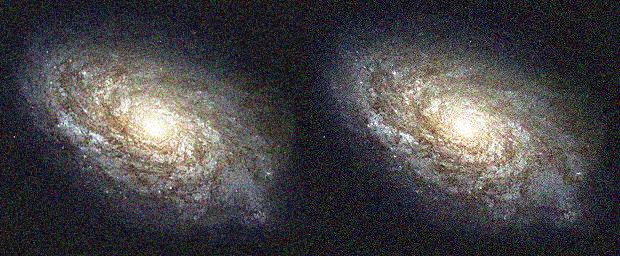

In [41]:
#jumlah citra average 30
psnr_img = PSNR(cv_img[0], cv_img[4])
print('Nilai PSNR adalah',psnr_img,'(dB)')
galaxy_frame = cv.hconcat((cv_img[0], cv_img[29]))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 28.426697025383966 (dB)


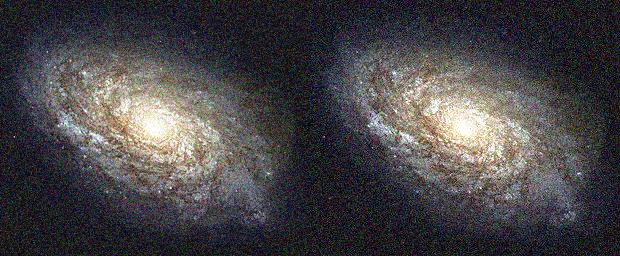

In [38]:
#jumlah citra average 60
psnr_img = PSNR(cv_img[0], cv_img[4])
print('Nilai PSNR adalah',psnr_img,'(dB)')
galaxy_frame = cv.hconcat((cv_img[0], cv_img[59]))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 28.426697025383966 (dB)


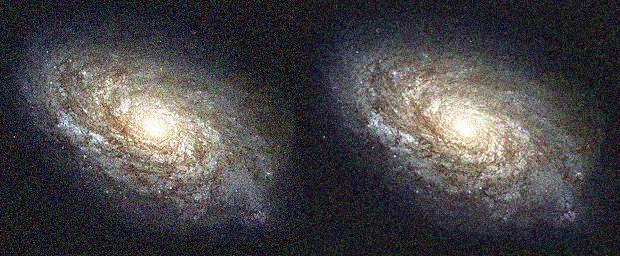

In [39]:
#jumlah citra average 80
psnr_img = PSNR(cv_img[0], cv_img[4])
print('Nilai PSNR adalah',psnr_img,'(dB)')
galaxy_frame = cv.hconcat((cv_img[0], cv_img[79]))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 28.426697025383966 (dB)


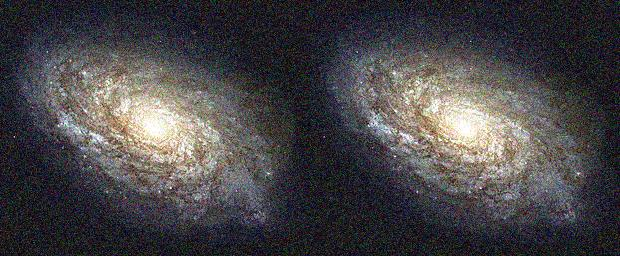

In [43]:
#jumlah citra average 100
psnr_img = PSNR(cv_img[0], cv_img[4])
print('Nilai PSNR adalah',psnr_img,'(dB)')
galaxy_frame = cv.hconcat((cv_img[0], cv_img[99]))
cv2_imshow(galaxy_frame)

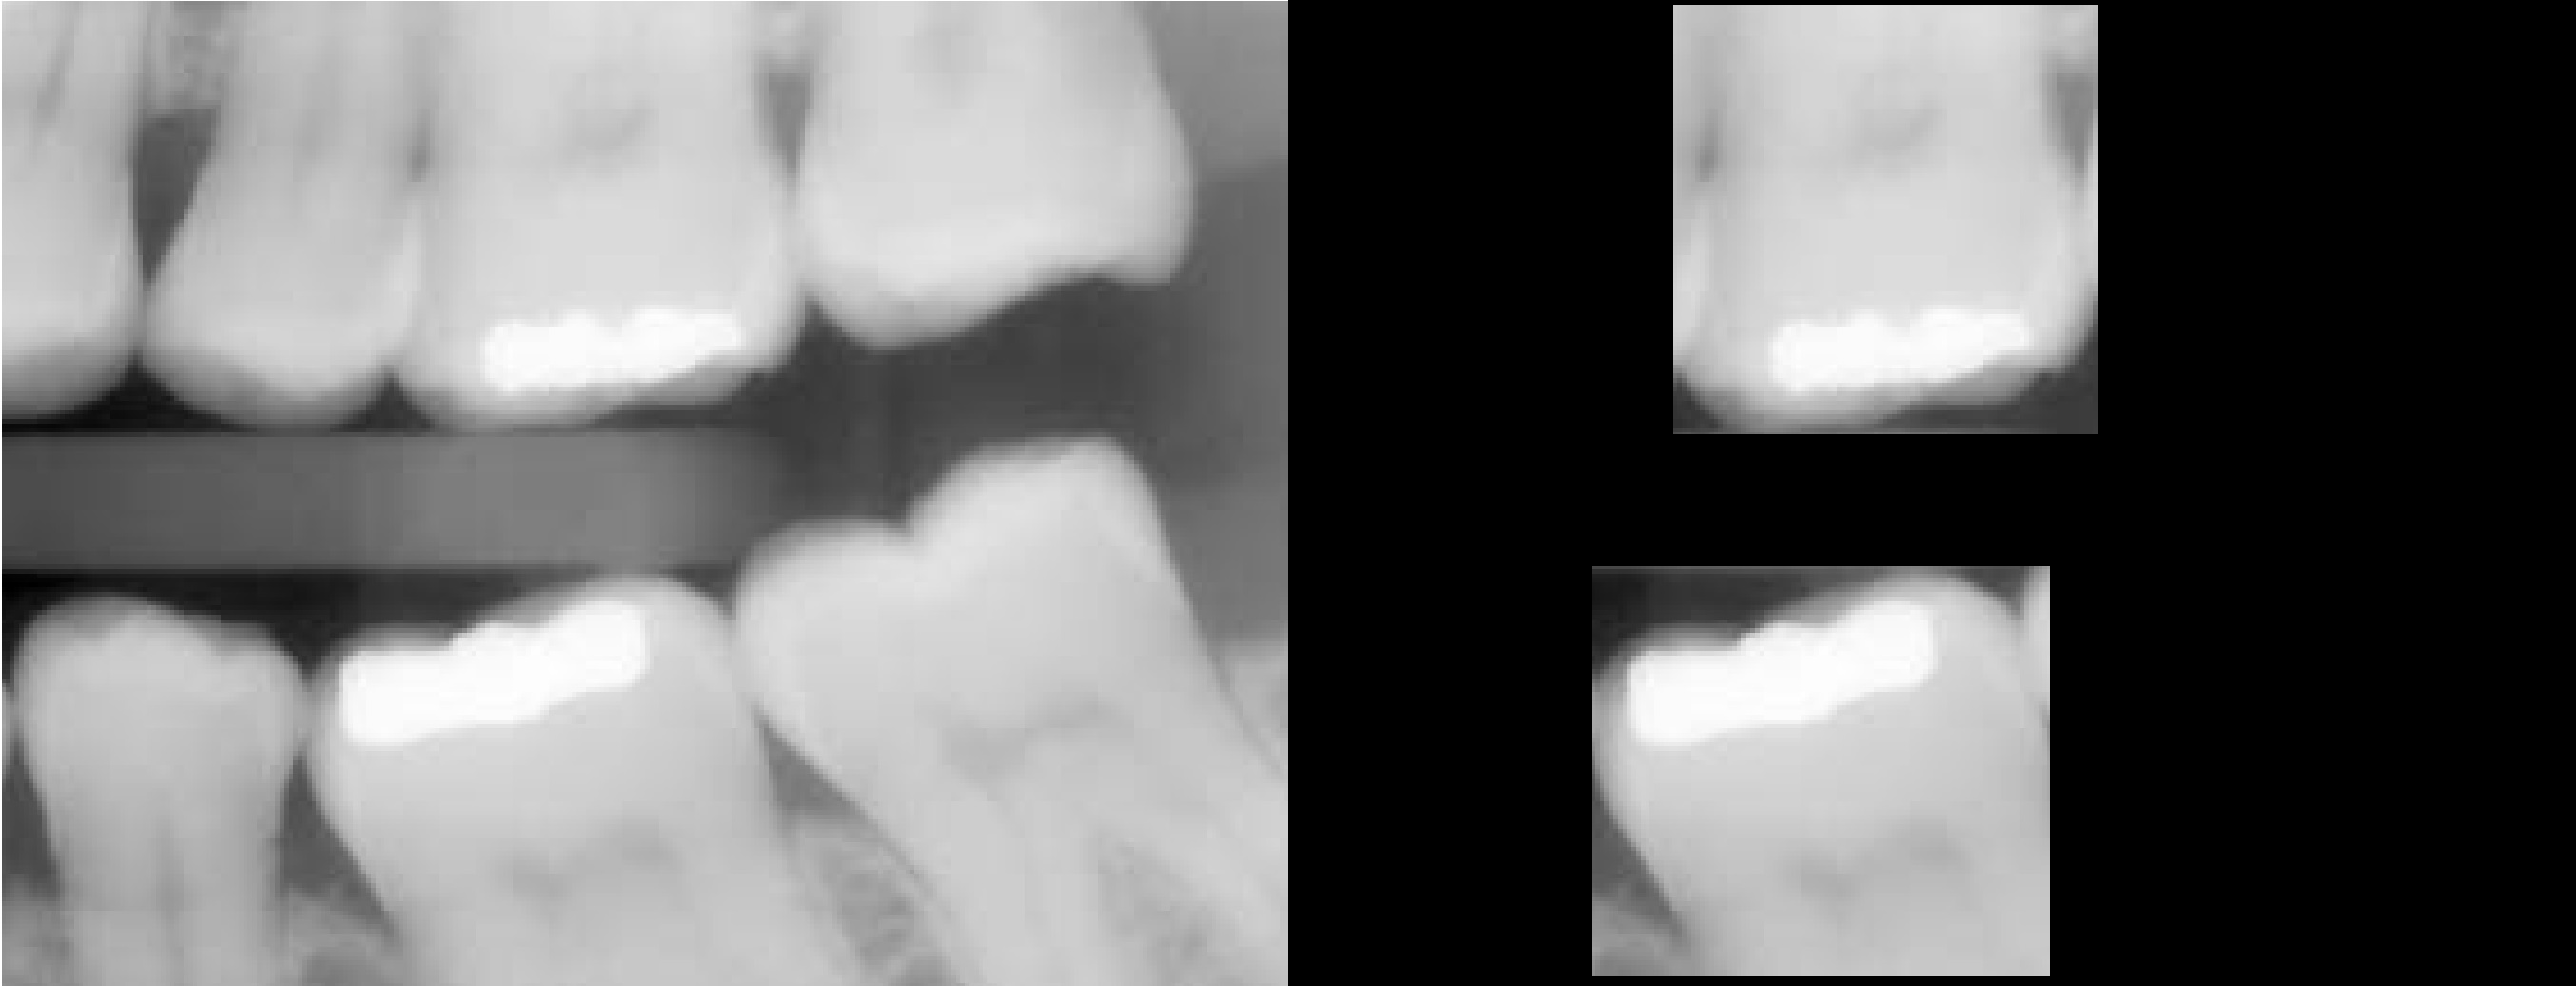

In [46]:
#praktikum4

img = cv.imread('/content/drive/MyDrive/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

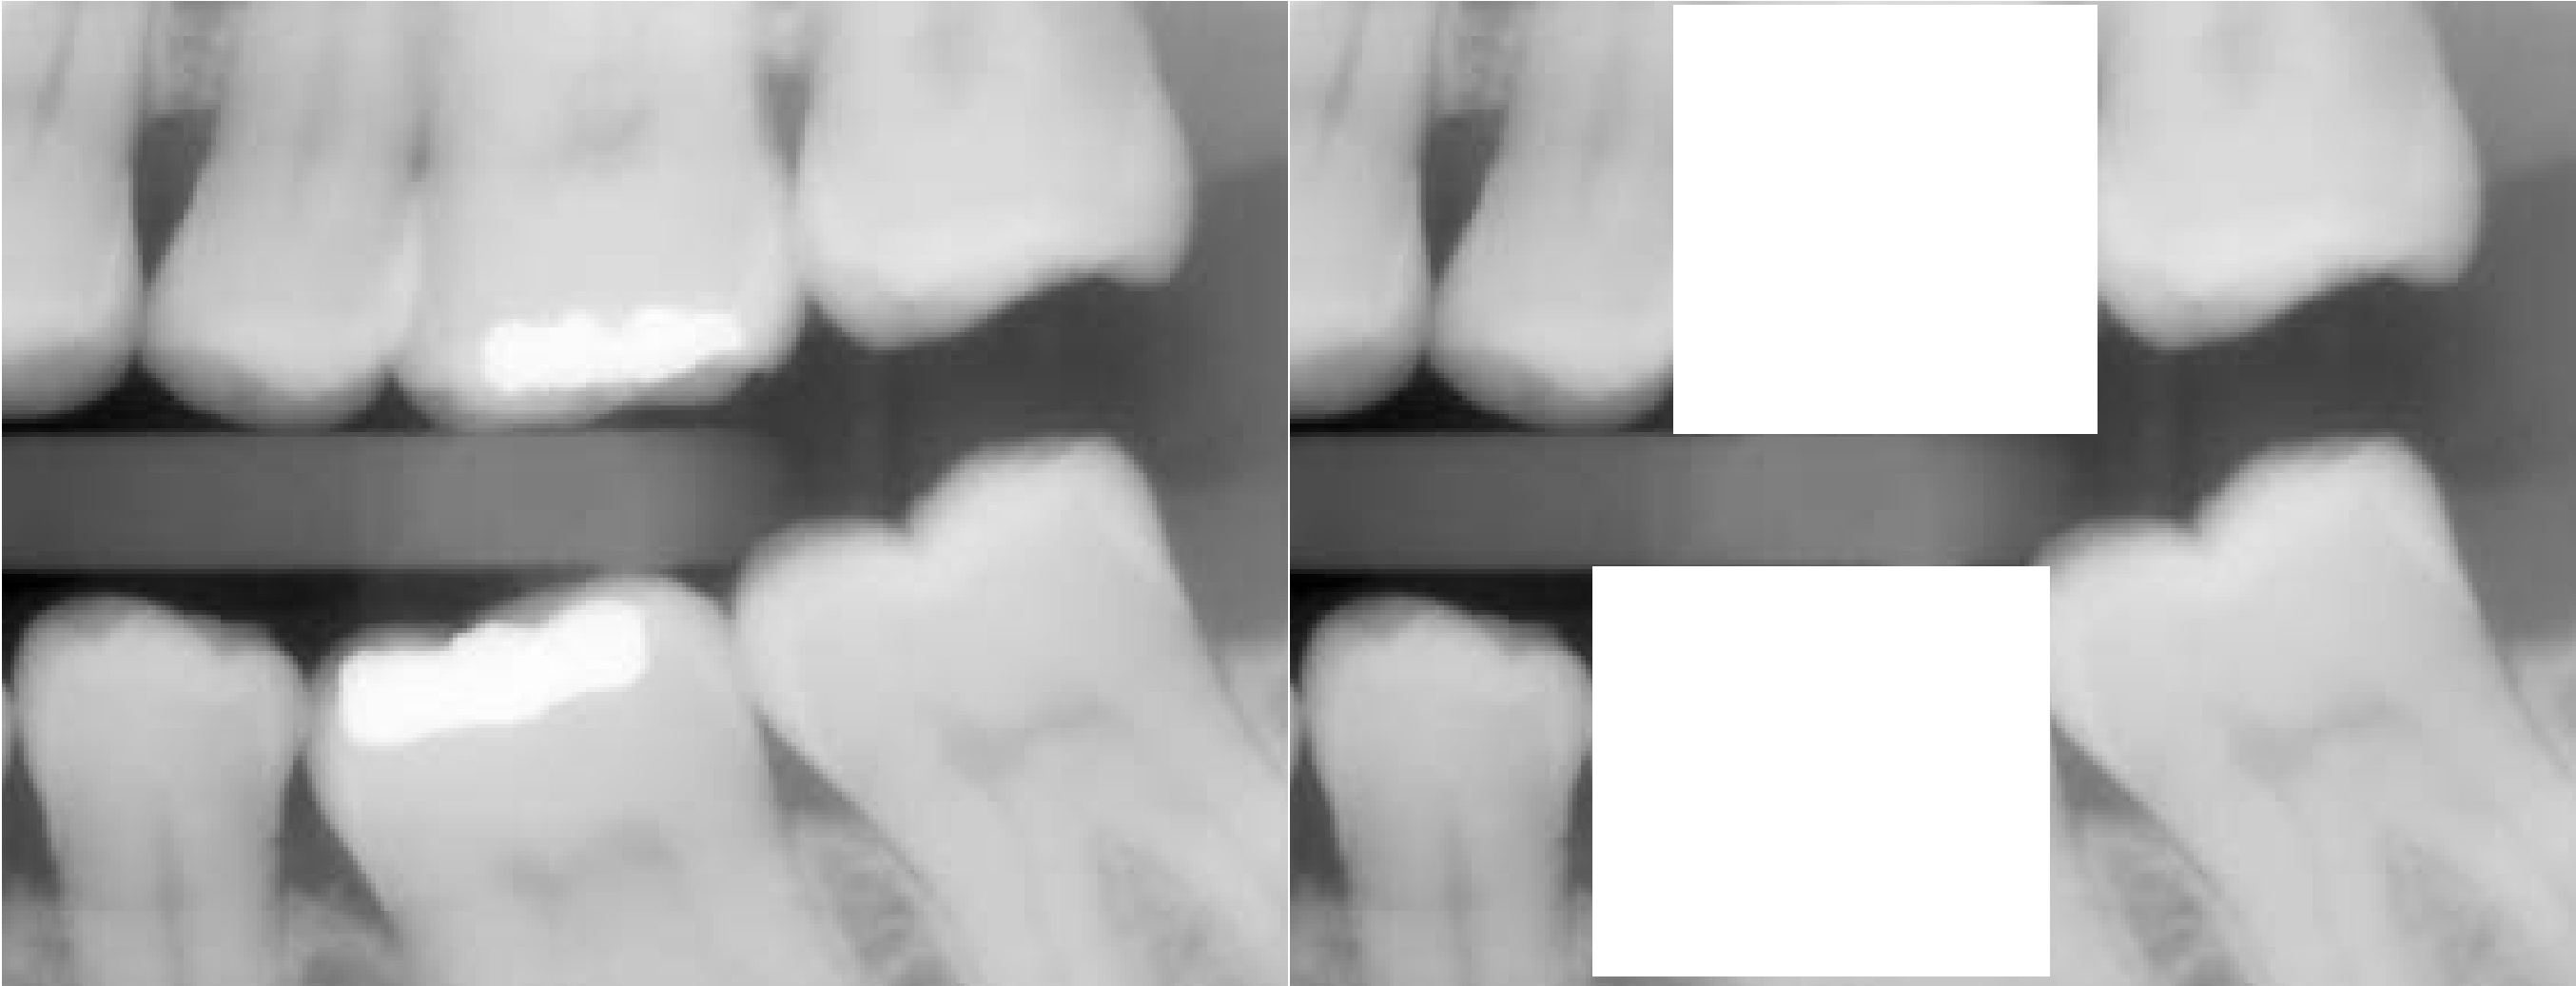

In [47]:
# Operasi OR
img = cv.imread('/content/drive/MyDrive/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

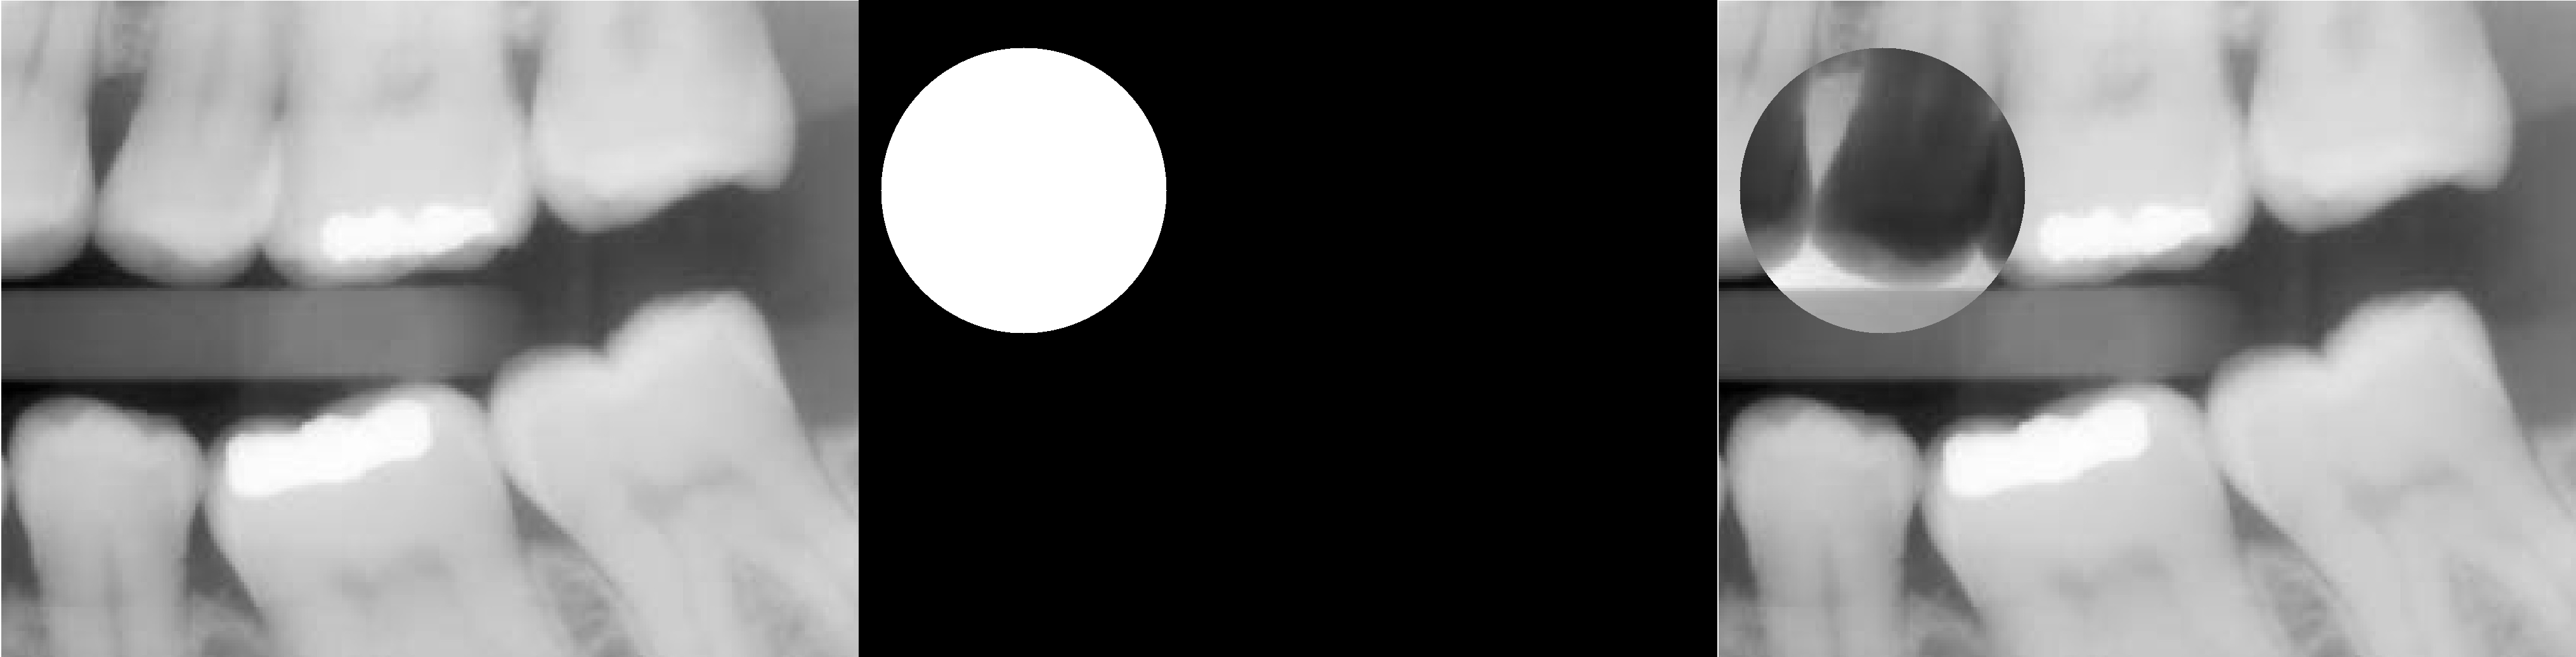

In [49]:
#Operasi NOT
img = cv.imread('/content/drive/MyDrive/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

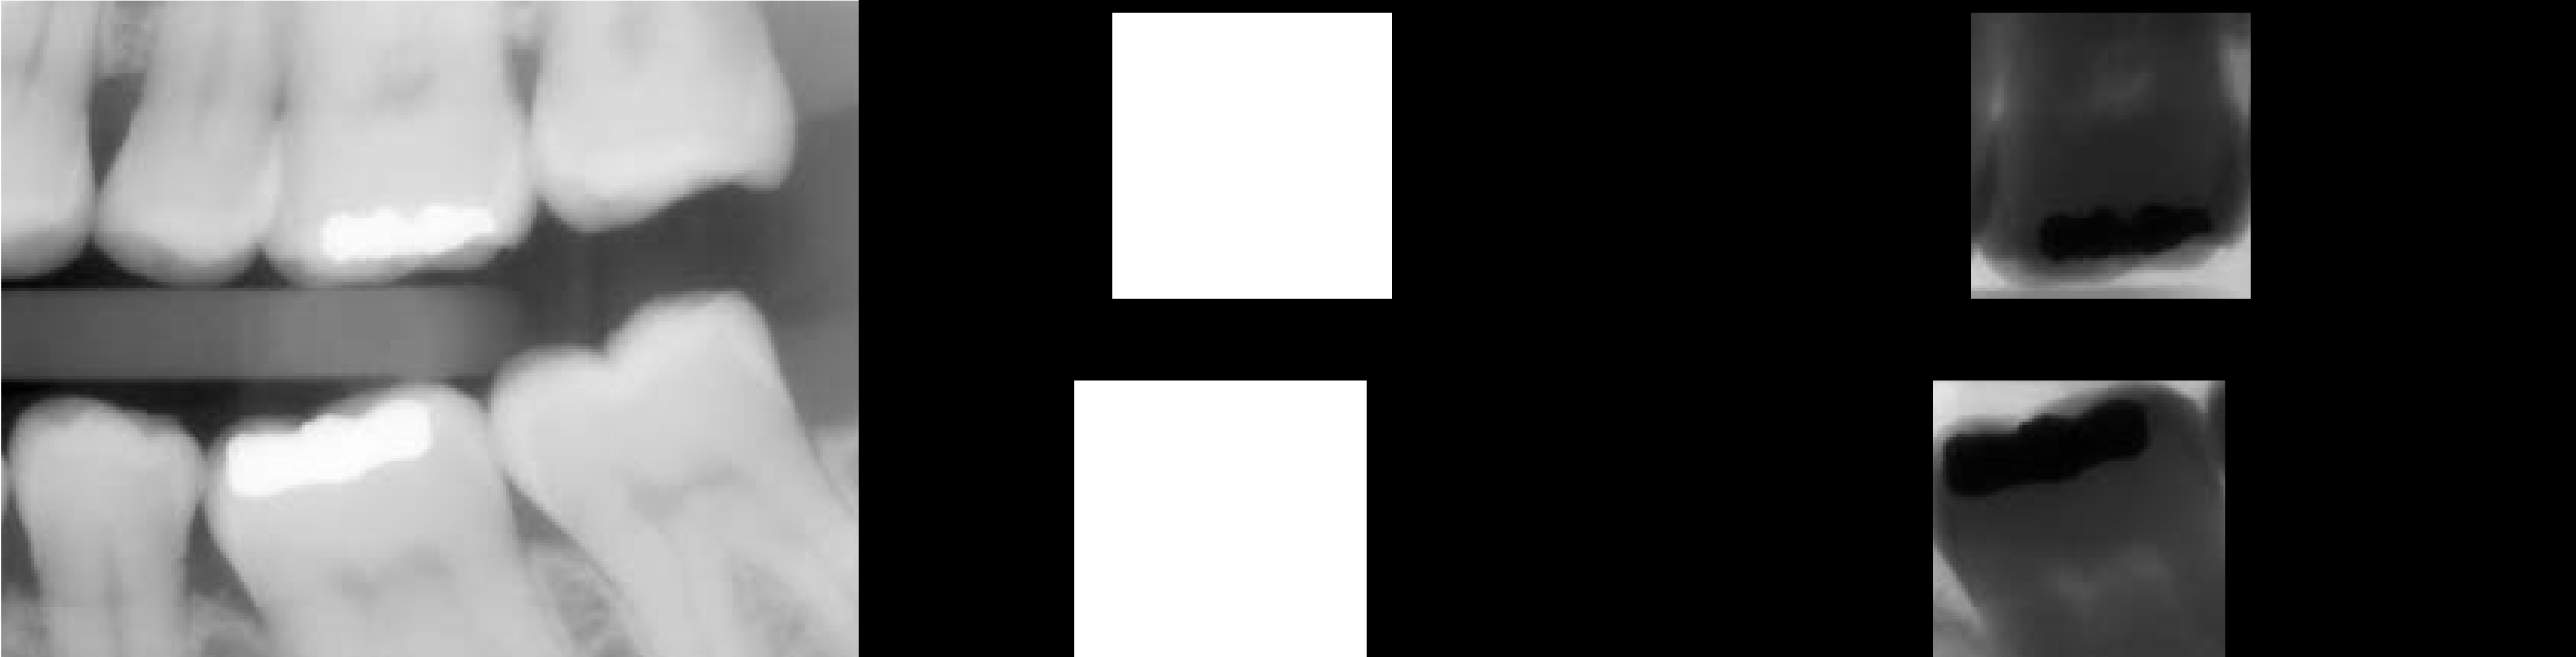

In [51]:
#Operasi NAND
img = cv.imread('/content/drive/MyDrive/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(400,20),pt2=(840,470),color=(255,255,255), thickness=-1)
mask = cv.rectangle(mask,pt1=(340,600),pt2=(800,1200),color=(255,255,255), thickness=-1)


result = ~img & mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

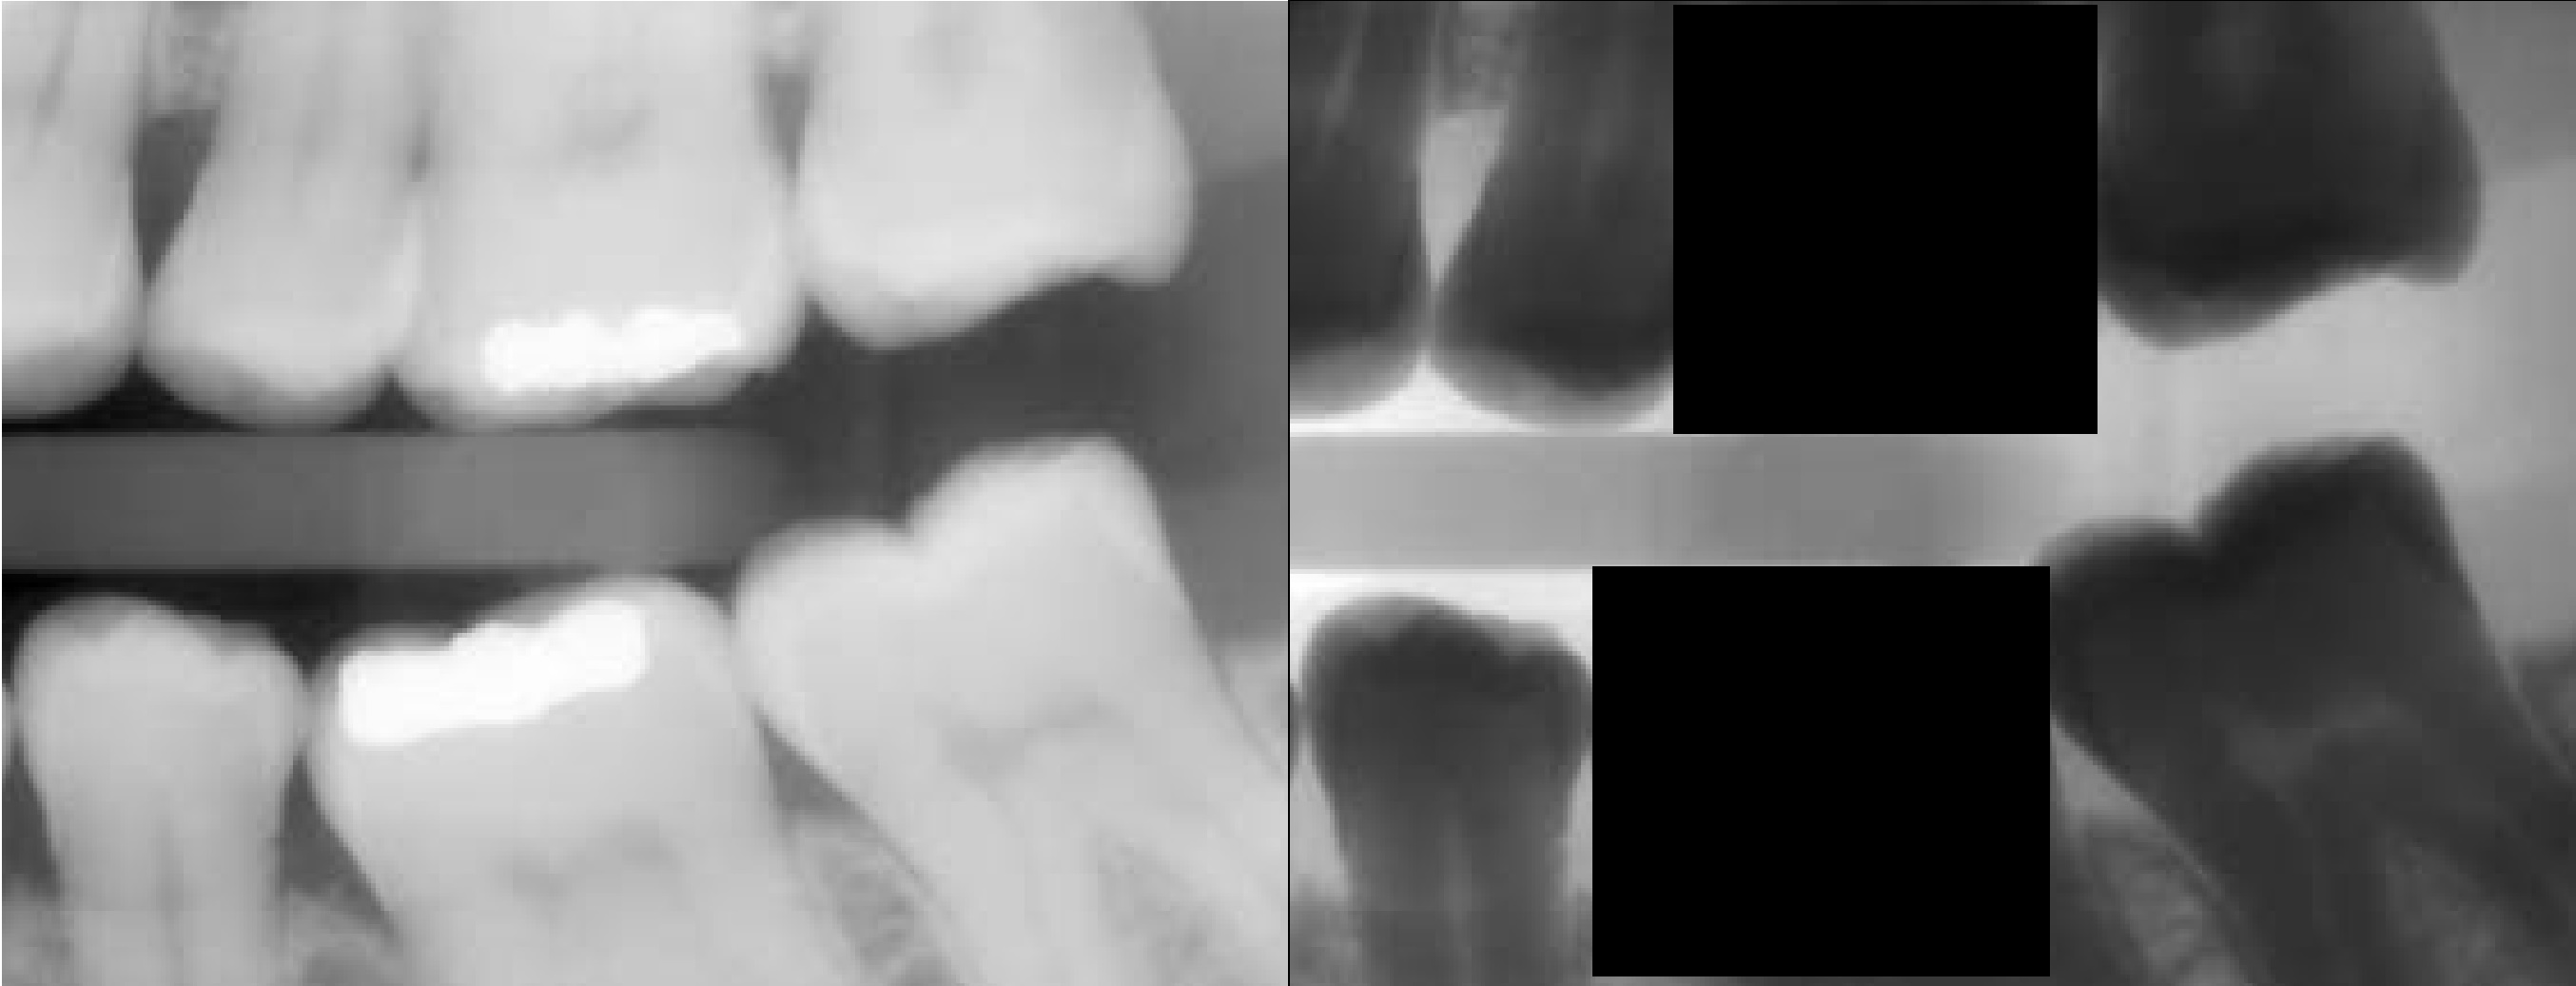

In [52]:
#Operasi XOR
img = cv.imread('/content/drive/MyDrive/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)